#Prequisites
In this exercise we use R and Python for data simulation and processing. Please install Python and scikit-learn for this exercise.

Enable in-line plotting for notebooks
%matplotlib inline

## Data

For this exercise we simulate Single Cell RNA sequence data using [Splatter package in R](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1305-0) which is publically available. 

First, one need to start `rmagic` by executing this in a cell:

%load_ext rpy2.ipython

Then, use `%%R` to execute cell magic. Use this if you want all syntax in a cell to be executed in R. Note that this must be placed at the beginning of the cell.

In [1]:
%load_ext rpy2.ipython

install bioconductor.
This may take some time!

In [ ]:
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.16")

install splatter

In [ ]:
%%R
BiocManager::install("splatter", verbose=FALSE)

## 1) Simulate 5000 samples with 2000 genes with following parameters
### 1.1) Simulate samples from two different groups (cell types) with mean of 0.6 and drop out probability of 0.3 and 0.6

In [4]:
%%R
suppressPackageStartupMessages({
  library(splatter)
  library(scater)
})

In [15]:
%%R
params <- newSplatParams()
params <- setParam(params, "nGenes", 2000)
params <- setParam(params, "mean.rate", 0.6)
params <- setParam(params, "dropout.type", "experiment")
params <- setParam(params, "dropout.mid", 0.3)

sim <- splatSimulate(params)
params

R[write to console]: Getting parameters...

R[write to console]: Creating simulation object...

R[write to console]: Simulating library sizes...

R[write to console]: Simulating gene means...

R[write to console]: Simulating BCV...

R[write to console]: Simulating counts...

R[write to console]: Simulating dropout (if needed)...

R[write to console]: Sparsifying assays...

R[write to console]: Automatically converting to sparse matrices, threshold = 0.95

R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'CellMeans': estimated sparse size 1.49 * dense matrix

R[write to console]: Skipping 'TrueCounts': estimated sparse size 2.37 * dense matrix

R[write to console]: Skipping 'DropProb': estimated sparse size 1.5 * dense matrix

R[write to console]: Conv

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (Cells)   [SEED] 
   2000      100    20727 

29 additional parameters 

Batches: 
    [Batches]  [Batch Cells]     [Location]        [Scale]       [Remove] 
            1            100            0.1            0.1          FALSE 

Mean: 
 (RATE)  (Shape) 
    0.6      0.6 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [TYPE]  (MIDPOINT)     (Shape) 
experiment         

In [16]:
%%R
write.table(counts(sim), "sim.txt")

### 1.2) Plot heatmap of the normalized samples with different dropout rates to depict the dropout effect.

In [20]:
import pandas as pd

sim = pd.read_table("sim.txt", sep=" ")
sim

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,...,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99,Cell100
Gene1,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Gene2,0,0,2,1,1,0,2,0,0,0,...,0,1,0,0,0,0,0,2,0,0
Gene3,7,3,11,0,4,0,10,0,1,7,...,6,4,0,3,7,14,6,2,0,0
Gene4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gene5,1,0,5,0,0,0,0,3,0,0,...,0,0,0,0,0,3,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene1996,0,4,1,0,0,4,0,0,0,0,...,4,2,4,4,1,6,0,0,1,0
Gene1997,4,0,0,0,11,0,0,0,0,0,...,0,0,0,4,6,0,0,5,4,0
Gene1998,45,51,61,65,28,26,60,36,41,35,...,30,40,33,81,45,51,47,63,17,25
Gene1999,0,0,0,0,2,0,1,0,0,0,...,0,0,0,1,1,1,0,3,0,0


In [21]:
!pip install seaborn

     |████████████████████████████████| 288 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.4 MB 96.4 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 965 kB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 41.7 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
     |████████████████████████████████| 295 kB 69.4 MB/s eta 0:00:01


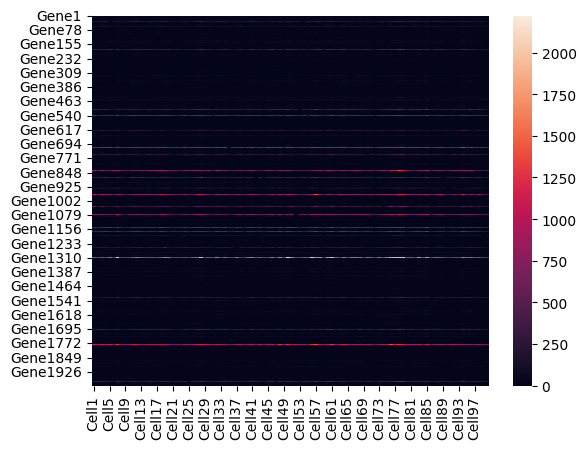

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(sim)
plt.show()

### 1.3) Simulate and illustrates tSNE visualization of simulated scRNA-seq data with six cell types with the same mean and dropout rates as before.

## 2) Normalization

### 2.1) Apply log transform on the simulated data and plot the heatmap 

In [33]:
import numpy as np
from scipy.stats import zscore

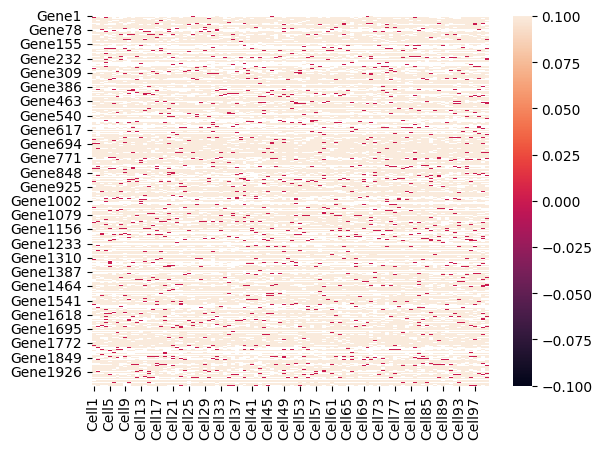

In [36]:
log_sim = sim.transform(lambda x: np.log2(x))
sns.heatmap(log_sim)
plt.show()

### 2.2) Normalize the simulated data using z-score and plot the heatmap

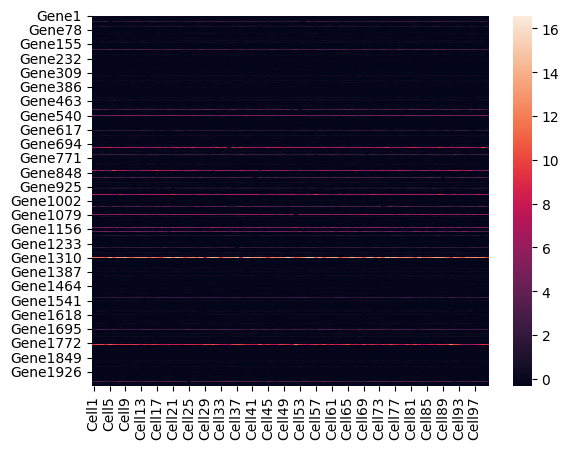

In [37]:
zscore_sim = zscore(sim)
sns.heatmap(zscore_sim)
plt.show()

## 3) Dimension reduction
### 3.1) Use PCA to reduce the data that was simulated in exercise 2) into two dimensions.

### 3.2) Plot the data in two dimensions with different colors for dataset a and b.

## 4) Batch effect
### 4.1) Simulate data with batch effect and plot the PCA dimensionality reduction (in two dimensions). Use following parameters:
1. three groups with 1000,1500, 2500 samples
2. from two cell type with frequency of 60% and 40%. 

you can use default values for the rest of parameters.

R[write to console]: Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
R[write to console]: 
 
R[write to console]:  You're computing too large a percentage of total singular values, use a standard svd instead.



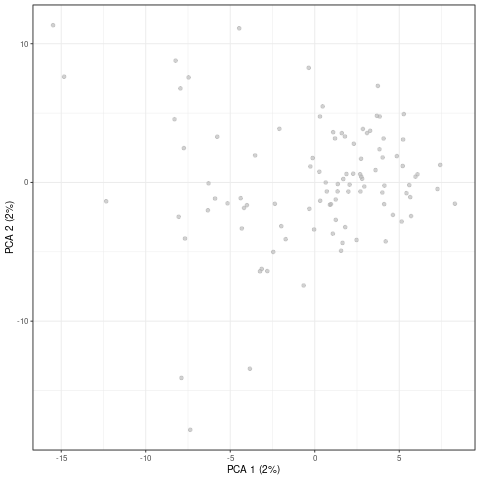

In [38]:
%%R
sim <- logNormCounts(sim)
sim <- runPCA(sim)
plotPCA(sim)